# Exercise 1: Classifying penguin species with PyTorch

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="750" />


Artwork by @allison_horst

In this exercise, we will use the python package [``palmerpenguins``](https://github.com/mcnakhaee/palmerpenguins) to supply a toy dataset containing various features and measurements of penguins.

We have already created a PyTorch dataset which yields data for each of the penguins, but first we should examine the dataset and see what it contains.

### Task 1: look at the data
In the following code block, we import the ``load_penguins`` function from the ``palmerpenguins`` package.

- Call this function, which returns a single object, and assign it to the variable ``data``.
  - Print ``data`` and recognise that ``load_penguins`` has returned a ``pandas.DataFrame``.
- Consider which features it might make sense to use in order to classify the species of the penguins.
  - You can print the column titles using ``pd.DataFrame.keys()``
  - You can also obtain useful information using ``pd.DataFrame.Series.describe()``

In [1]:
from palmerpenguins import load_penguins

data = load_penguins()

# Note: ``pd.DataFrame.describe`` is a useful function for giving an overiew
# of what a ``pd.DataFrame`` contains.
print(data.describe())

print(data.keys())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


Let's now disuss the features we will use to classify the penguins' species, and populate the following list together:

#### Let's use:

- ``"bill_length_mm"``
    - Biologically relevant and unambiguous.
- ``"bill_depth_mm"``
    - Biologically relevant.
- ``flipper_length_mm``
    - Biologically relevant.
- ``"body_mass_g"``
    - Biologically relevant.
- ``"sex"``
    - While a potential source of bias, it is likely informative and biologically relevant.

#### Let's reject
- ``"island"``
    - While island is likely to be predictive, it seems potentially misleading to use this feature. One island could be heavily dominated by one species of penguin, while other species abide there in much smaller numbers. Such a situation could result in a model giving too much weight to this feature, and confounding the results.
- ``"year"``
    - This feature could also be important: then behaviour of certain species may be changing in response to time-dependent environmental factors such as melting ice. It does however seem like the least biologically-relevant feature, and the most likely source of bias, so we reject it.

### Task 2: creating a ``torch.utils.data.Dataset``

All PyTorch dataset objects are subclasses of the ``torch.utils.data.Dataset`` class. To make a custom dataset, create a class which inherits from the ``Dataset`` class, implement some methods (the Python magic (or dunder) methods ``__len__`` and ``__getitem__``) and supply some data.

Spoiler alert: we've done this for you already in ``src/ml_workshop/_penguins.py``.

- Open the file ``src/ml_workshop/_penguins.py``.
- Let's examine, and discuss, each of the methods together.
  - ``__len__``
    - What does the ``__len__`` method do?
      - The ``__len__`` method is a so-called "magic method", which tells python to do if the ``len`` function is called on the object containing it.
  - ``__getitem__``
    - What does the ``__getitem__`` method do?
      - The ``__getitem__`` method is another magic method which tells python what to do if we try and index the object containing it (i.e. ``my_object[idx]``).
- Review and discuss the class arguments.
  - ``input_keys``— A sequence of strings telling the data set which objects to return as inputs to the model.
  - ``target_keys``— Same as ``input_keys`` but specifying the targets.
  - ``train``— A boolean variable determining if the model returns the training or validation split (``True`` for training).
  - ``x_tfms``— A ``Compose`` object with functions which will convert the raw input to a tensor. This argument is _optional_.
  - ``y_tfms``— A ``Compose`` object with functions which will convert the raw target to a tensor. This argument is _optional_.

### Task 3: obtaining training and validation datasets

- Instantiate the penguin dataloader.
  - Make sure you supply the correct column titles for the features and the targets.
- Iterate over the dataset
    - Hint:
        ```python
        for features, targets in dataset:
            # print the features and targets here
        ```

In [2]:
from ml_workshop import PenguinDataset

features = [
    "bill_length_mm",
    "bill_depth_mm",
    "body_mass_g",
    "flipper_length_mm",
    "sex",
]

target_names = sorted(data.species.unique())

data_set = PenguinDataset(
    input_keys=features,
    target_keys=["species"],
    train=True,
)

for _, (input_feats, target) in zip(range(20), data_set):
    print(features, target)

['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)
['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'sex'] ('Gentoo',)

- Can we give these items to a neural network, or do they need to be transformed first?
  - Short answer: no, we can't just pass tuples of numbers or strings to a neural network.
    - We must represent these data as ``torch.Tensor``s.

### Task 4: Applying transforms to the data

A common way of transforming inputs to neural networks is to apply a series of transforms using ``torchvision.transforms.Compose``. The ``Compose`` object takes a list of callable objects and applies them to the incoming data.

These transforms can be very useful for mapping between file paths and tensors of images, etc.

In [3]:
from torch import tensor, float32, eye
from torchvision.transforms import Compose


# Apply the transforms we need to the PenguinDataset to get out inputs
# targets as Tensors.

def get_input_transforms() -> Compose:
    """Return transforms which map from raw inputs to tensors.

    Returns
    -------
    Compose
        A composition of transforms (callable functions) to map the the tuple
        of input features (``Tuple[float, ...]``) to a ``torch.Tensor``.

    Notes
    -----
    To create a ``torch.Tensor`` we can use ``torch.tensor([1.0, 2.0, ...])``

    """
    return Compose([lambda x: tensor(x, dtype=float32)])


def get_target_tfms() -> Compose:
    """Return transforms which map from the raw target strings to tensor.
    Returns
    -------
    Compose
        A composition of transforms (callable functions) to map the the tuple
        of input features (``Tuple[str]``) to a ``torch.Tensor``.

    Notes
    -----
    Suppose we have three labels, "A", "B" and "C". We want to encoder each
    distinct label as a one-hot-encoded vector. A natural way to do this is:
    - "A" — [1, 0, 0]
    - "B" — [0, 1, 0]
    - "C" — [0, 0, 1]

    The transforms this function produces will return these vectors as tensors.
    Note also, in the example we have just given, A's vector was the first row in the identity matrix, B's the second, etc.

    """
    return Compose([lambda x: eye(len(target_names))[target_names.index(x[0])]])


train_set = PenguinDataset(
    input_keys=features,
    target_keys=["species"],
    train=True,
    x_tfms=get_input_transforms(),
    y_tfms=get_target_tfms(),
)


valid_set = PenguinDataset(
    input_keys=features,
    target_keys=["species"],
    train=False,
    x_tfms=get_input_transforms(),
    y_tfms=get_target_tfms(),
)


for _, (input_feats, target) in zip(range(5), train_set):
    print(input_feats, target)


tensor([  42.9000,   13.1000, 5000.0000,  215.0000,    0.0000]) tensor([0., 0., 1.])
tensor([  46.1000,   13.2000, 4500.0000,  211.0000,    0.0000]) tensor([0., 0., 1.])
tensor([  44.9000,   13.3000, 5100.0000,  213.0000,    0.0000]) tensor([0., 0., 1.])
tensor([  43.3000,   13.4000, 4400.0000,  209.0000,    0.0000]) tensor([0., 0., 1.])
tensor([  42.0000,   13.5000, 4150.0000,  210.0000,    0.0000]) tensor([0., 0., 1.])


### Task 5: Creating ``DataLoaders``—and why

- Once we have created a ``Dataset`` object, we wrap it in a ``DataLoader``.
  - The ``DataLoader`` object allows us to put our inputs and targets in mini-batches, which makes for more efficient training.
    - Note: rather than suppling one input-target pair to the model at a time, we supply "mini-batches" of these data at once.
    - The number of items we supply at once is called the batch size.
  - The ``DataLoader`` can also randomly shuffle the data each epoch (when training).
  - It allows us to load different mini-batches in parallel, which can be very useful for larger datasets and images that can't all fit in memory at once.

In [4]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)

valid_loader = DataLoader(
    valid_set,
    batch_size=batch_size,
    shuffle=False
)

for batch, targets in valid_loader:
    print(batch.shape, targets.shape)

torch.Size([16, 5]) torch.Size([16, 3])
torch.Size([16, 5]) torch.Size([16, 3])
torch.Size([16, 5]) torch.Size([16, 3])
torch.Size([12, 5]) torch.Size([12, 3])


### Task 6: Creating a neural network in PyTorch

Here we will create our neural network in PyTorch, and have a general discussion on clean and messy ways of going about it.

- First, we will create quite an ugly network to highlight how to make a neural network in PyTorch on a very basic level.
- We will then discuss a trick for making the print-out nicer.
- Finally, we will discuss how the best approach would be to write a class where various parameters (e.g. number of layers, droupout probabilities, etc.) are passed as arguments.

In [5]:
from torch.nn import Module
from torch.nn import BatchNorm1d, Linear, ReLU, Dropout, Sequential
from torch import Tensor


class FCNet(Module):
    """Fully-connected neural network.

    Parameters
    ----------
    in_feats : int
        The number of input features to the model.
    out_feats : int
        The number of output features (or classes) the model should produce.

    Notes
    -----
    The ``torch.nn.Sequential`` allows us to "chain" multiple layers, rather
    than manually passing the output of one to the next in the forward
    function.

    """

    def __init__(self, in_feats: int, out_feats: int):
        """Build the neural network."""
        super().__init__()
        self._fwd_seq = Sequential(
            BatchNorm1d(in_feats),
            Linear(in_feats, 16),
            BatchNorm1d(16),
            Dropout(0.1),
            Linear(16, 16),
            BatchNorm1d(16),
            Dropout(0.1),
            Linear(16, out_feats),
        )

    def forward(self, batch: Tensor) -> Tensor:
        """Pass ``batch`` through the model.

        Parameters
        ----------
        batch : Tensor
            A mini-batch of inputs.

        Returns
        -------
        Tensor
            The result of passing ``batch`` through the model.

        """
        return self._fwd_seq(batch)


    def forward(self, batch : Tensor) -> Tensor:
        """Pass ``batch`` through the model.
        
        Parameters
        ----------
        batch : Tensor
            A mini-batch of inputs.
        
        Returns
        -------
        Tensor
            The result of passing ``batch`` through the model.
        
        """
        return self._fwd_seq(batch)


model = FCNet(len(features), len(target_names))
print(model)

FCNet(
  (_fwd_seq): Sequential(
    (0): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=5, out_features=16, bias=True)
    (2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.1, inplace=False)
    (7): Linear(in_features=16, out_features=3, bias=True)
  )
)


### Task 7: Selecting a loss function

- Binary cross-entropy is about the most common loss function for classification.
  - Details on this loss function are available in the [PyTorch docs](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html).
- Let's instantiate it together.

In [6]:
from torch.nn import BCELoss

loss_func = BCELoss()

### Task 8: Selecting an optimiser

While we talked about stochastic gradient descent in the slides, most people use the so-called [Adam optimiser](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html).

You can think of it as a more complex and improved implementation of SGD.

In [7]:
# Create an optimiser and give it the model's parameters.
from torch.optim import Adam

optimiser = Adam(model.parameters())

### Task 9: Writing basic training and validation loops

- Before we jump in and write these loops, we must first choose an activation function to apply to the model's outputs.
  - Here we are going to use the softmax activation function: see [the PyTorch docs](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).
  - For those of you who've studied physics, you may be remininded of the partition function in thermodynamics.
  - This activation function is good for classifcation when the result is one of ``A or B or C``.
    - It's bad if you even want to assign two classification to one images—say a photo of a dog _and_ and cat.
  - It turns the raw outputs, or logits, into "psuedo probabilities", and we take our prediction to be the most probable class.

- We will write the training loop together, then you can go ahead and write the (simpler) validation loop.

In [8]:
from typing import Dict

from numpy import mean

from torch import no_grad

def train_one_epoch(
    model: Module,
    train_loader: DataLoader,
    optimiser: Adam,
    loss_func: BCELoss,
) -> Dict[str, float]:
    """Train ``model`` for once epoch.

    Parameters
    ----------
    model : Module
        The neural network.
    train_loader : DataLoader
        Training dataloader.
    optimiser : Adam
        The optimiser.
    loss_func : BCELoss
        Binary cross-entropy loss function.

    Returns
    -------
    Dict[str, float]
        A dictionary of metrics.

    Notes
    -----
    - The ``model.train()`` is very important:
        - it turns on the dropout layers.
        - it tells the batch norm layers to use the incoming statistics, and let them contribute to their "memory".

    """
    model.train()
    metrics : Dict[str, float] = {"loss": [], "accuracy": []}

    for batch, targets in train_loader:

        optimiser.zero_grad()

        preds = model(batch).softmax(dim=1)

        loss = loss_func(preds, targets)

        loss.backward()

        optimiser.step()

        metrics["loss"].append(loss.item())
        metrics["accuracy"].append(batch_level_accuracy(preds, targets))
    
    return {key: mean(val) for key, val in metrics.items()}


@no_grad()
def validate_one_epoch(
    model: Module,
    valid_loader: DataLoader,
    loss_func: BCELoss,
) -> Dict[str, float]:
    """Validate ``model`` for a single epoch.

    Parameters
    ----------
    model : Module
        The neural network.
    valid_loader : DataLoader
        Training dataloader.
    loss_func : BCELoss
        Binary cross-entropy loss function.

    Returns
    -------
    Dict[str, float]
        Metrics of interest.

    Notes
    -----
    - The ``model.eval()`` is also very important:
        - It turns off the dropout layers, which are likely to impair the validation performance and render it unrealistically poor.
        - It tells the batchnorm layers to _not_ use the batch's statistics,
        and to instead use the stats it has built up from the training set. The model should not "remember" anything from the validation set.
    - We also protect this function with ``torch.no_grad()``, because having gradients enable while validating is a pointless waste of resources—they are only needed for training.

    """
    model.eval()
    metrics : Dict[str, float] = {"loss": [], "accuracy": []}

    for batch, targets in valid_loader:

        preds = model(batch).softmax(dim=1)

        loss = loss_func(preds, targets)

        metrics["loss"].append(loss.item())
        metrics["accuracy"].append(batch_level_accuracy(preds, targets))

    return {key: mean(val) for key, val in metrics.items()}



@no_grad()
def batch_level_accuracy(preds : Tensor, targets : Tensor):
    """Compute the batch-level accuracy.
    
    Parameters
    ----------
    preds : Tensor
        The model's predictions.
    targets : Tensor
        The corresponding labels.

    Returns
    -------
    float
        The batch-level accuracy.

    Notes
    -----
    - This function assumes the ``preds`` have had the softmax applied to them along dimension 1, and that the predicted class is therefore ``preds.argmax(dim=1)``.
    
    """
    return (preds.argmax(dim=1) == targets.argmax(dim=1)).float().mean()

### Task 10: Training, extracting and plotting metrics

- Now we can train our model for a specified number of epochs.
  - During each epoch the model "sees" each training item once.
- Append the training and validation metrics to a list.
- Turn them into a ``pandas.DataFrame``
  - Note: You can turn a ``List[Dict[str, float]]``, say ``my_list`` into a ``DataFrame`` with ``DataFrame(my_list)``.
- Use Matplotlib to plot the training and validation metrics as a function of the number of epochs.

We will begin the code block together before you complete it independently.  
After some time we will go through the solution together.

In [9]:
from pandas import DataFrame

epochs = 20

train_metrics, valid_metrics = [], []

for _ in range(epochs):
    
    train_metrics.append(train_one_epoch(model, train_loader, optimiser, loss_func))

    valid_metrics.append(validate_one_epoch(model, valid_loader, loss_func))


train_metrics = DataFrame(train_metrics)
valid_metrics = DataFrame(valid_metrics)

metrics = train_metrics.join(valid_metrics, lsuffix="_train", rsuffix="_valid")

print(metrics)

    loss_train  accuracy_train  loss_valid  accuracy_valid
0     0.533762        0.591912    0.461864        0.640625
1     0.348025        0.849265    0.313900        0.906250
2     0.259717        0.930147    0.232548        0.937500
3     0.214962        0.959559    0.189160        0.953125
4     0.164167        0.970588    0.162155        0.968750
5     0.142430        0.966912    0.139038        0.968750
6     0.124524        0.966912    0.120329        0.968750
7     0.129425        0.952206    0.101984        0.968750
8     0.105477        0.977941    0.095053        0.968750
9     0.083399        0.988971    0.091342        0.968750
10    0.106912        0.963235    0.082006        0.968750
11    0.098682        0.959559    0.072168        0.968750
12    0.079347        0.966912    0.070107        0.968750
13    0.081416        0.974265    0.064306        0.968750
14    0.094204        0.963235    0.060710        0.984375
15    0.065146        0.981618    0.062441        0.9687

### Task 11: Visualise some results

Let's do this part together—though feel free to make a start on your own if you have completed the previous exercises.

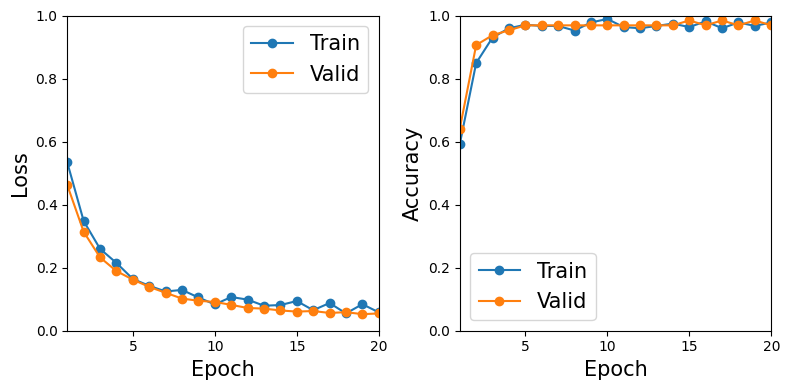

In [10]:
import matplotlib.pyplot as plt
from numpy import linspace


quantities = ["loss", "accuracy"]
splits = ["train", "valid"]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for axis, quant in zip(axes.ravel(), quantities):
    for split in splits:

        key = f"{quant}_{split}"
        axis.plot(linspace(1, epochs, epochs), metrics[key], "-o", label=split.capitalize(),)
    axis.set_ylabel(quant.capitalize(), fontsize=15)

for axis in axes.ravel():
    axis.legend(fontsize=15)
    axis.set_ylim(bottom=0.0, top=1.0)
    axis.set_xlim(left=1, right=epochs)
    axis.set_xlabel("Epoch", fontsize=15)

fig.tight_layout()


### Bonus: Run the net on 'new' inputs

We have built and trained a net, and evaluated and visualised its performance. However, how do we now utilise it going forward?

Here we construct some 'new' input data and use our trained net to infer the species. Whilst this is relatively straightforward there is still some work required to transform the outputs from the net to a meaningful result.

In [11]:
from torch import no_grad

# Construct a tensor of inputs to run the model over
demo_input = tensor([[42.9, 13.1, 5000.0, 215.0, 0.0],
                     [33.6, 11.3, 2000.0, 211.0, 1.0],])
print(f"Raw input:\n{demo_input}\n")

# Place model in eval mode and run over inputs with no_grad
model.eval()
with no_grad():
    demo_output = model(demo_input)

# Print the raw output from the net
print(f"Raw output:\n{demo_output}\n")

# Transform the raw output back to human-readable format
print(f"Predicted species:\n{[target_names[val.argmax()] for val in demo_output]}\n")

Raw input:
tensor([[4.2900e+01, 1.3100e+01, 5.0000e+03, 2.1500e+02, 0.0000e+00],
        [3.3600e+01, 1.1300e+01, 2.0000e+03, 2.1100e+02, 1.0000e+00]])

Raw output:
tensor([[-2.1301, -2.9901,  4.3844],
        [ 2.6907, -3.2713,  0.5135]])

Predicted species:
['Gentoo', 'Adelie']

